
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E03_overfit_regularization.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Overfit and regularization exercises 

---
These are introductory exercises in Machine learning with focus in **overfitting and regularization** .

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Tips data EDA (*)

In the whole exercise, we will work with the "tips" dataset from seaborn dataset. Start by loading dataset "tips" from the ```load_dataset``` method in seaborn module. The goal will be to use polynomial linear regression to predict tips. 

&nbsp; a) Start by doing some initial EDA such as info(), describe().

In [1]:
import seaborn as sns

tips = sns.load_dataset("tips")

tips.info(), tips.describe(), tips.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


(None,
        total_bill         tip        size
 count  244.000000  244.000000  244.000000
 mean    19.785943    2.998279    2.569672
 std      8.902412    1.383638    0.951100
 min      3.070000    1.000000    1.000000
 25%     13.347500    2.000000    2.000000
 50%     17.795000    2.900000    2.000000
 75%     24.127500    3.562500    3.000000
 max     50.810000   10.000000    6.000000,
    total_bill   tip     sex smoker  day    time  size
 0       16.99  1.01  Female     No  Sun  Dinner     2
 1       10.34  1.66    Male     No  Sun  Dinner     3
 2       21.01  3.50    Male     No  Sun  Dinner     3
 3       23.68  3.31    Male     No  Sun  Dinner     2
 4       24.59  3.61  Female     No  Sun  Dinner     4)


&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. Plot the descriptive statistics for each numerical column, with a adequate plot type (e.g. barplot).

In [2]:
tips_cleaned = tips.drop(["sex", "smoker", "day", "time"], axis=1)

In [3]:
tips_cleaned.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<Axes: >

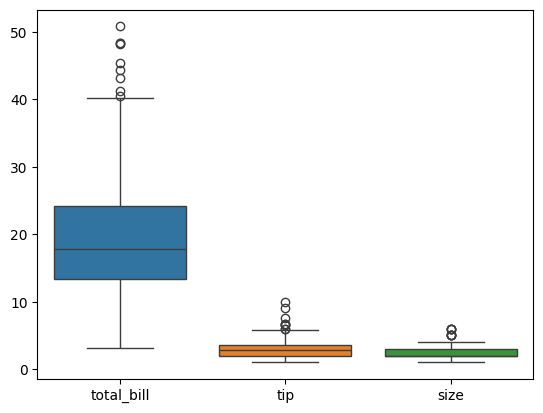

In [4]:
sns.boxplot(tips_cleaned)

&nbsp; c) Based on the initial EDA, make some more plots on things you think could be worthwhile to investigate. 

In [5]:
tips.groupby('sex', observed=False)[['tip', 'size']].sum()

,tip,size
sex,,
Male,485.07,413
Female,246.51,214


In [6]:
tips["Tip_per_serving"] = tips["tip"] / tips["size"]
tips.groupby('sex')[['Tip_per_serving']].mean()

C:\Users\Mikae\AppData\Local\Temp\ipykernel_10268\3878473308.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('sex')[['Tip_per_serving']].mean()


,Tip_per_serving
sex,
Male,1.222824
Female,1.194603


c:\Users\Mikae\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


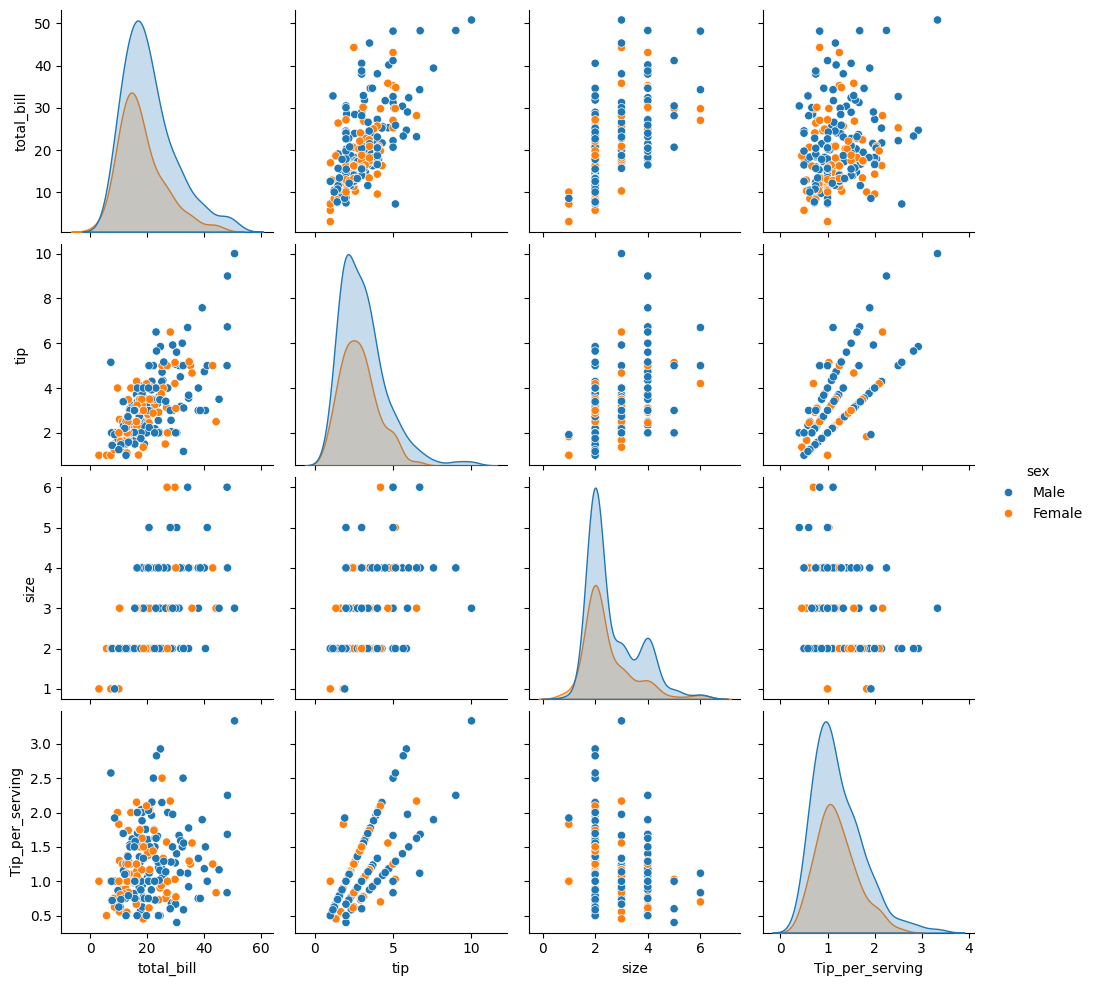

In [7]:
sns.pairplot(tips, hue="sex")

&nbsp; d) Try discuss your findings with yourself/colleague and draw some conclusions if possible. Note that in reality, it is important to be able to communicate your findings so that other people in your team/customers/stakeholders etc. get an understanding of the data and realizes the importance of your role as a data scientist/analyst.

* Men tend to tip a bit more, and pay to a greater extent if there are more participants
* Single guests don't tip as much as when there are peers around.
* The tip seems not to go up much beyond a certain point.
* There are some outliers when it comes to the amount of tip compared to the total bill.


<details>

<summary>Answer</summary>


b)
<img src="../assets/df_describe.png" height="300"/>

c) Here are some example plots

<img src="../assets/tips_EDA.png" height="300"/>

<img src="../assets/tips_smoke_sex.png" width="500"/>

<img src="../assets/tips_bar_sex.png" width="300"/>


d) For example: 
- there are almost double amount of females represented in the dataset
- there are very few tables with 1 person eating, and they usually give very low tip
- female and male tip somewhat similar

</details>

---

## 1. Train|test split (*)

Split the data into training part and testing part, using sklearn's train_test_split with test size of 0.3 and random_state 42.

In [8]:
from sklearn.model_selection import train_test_split

X = tips_cleaned.drop(['tip'], axis=1)
y = tips_cleaned['tip']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((170, 2), (74, 2), (170,), (74,))

---
## 2. Feature standardization (*)

We need to normalize the data and in this case will be using feature standardization. Implement this yourself following this formula:

$$X_{train}' = \frac{X_{train}-\mu_{train}}{\sigma_{train}}$$

$$X_{test}' = \frac{X_{test}-\mu_{train}}{\sigma_{train}}$$

, where $'$ denotes scaled, $\mu_{train}$ is the mean of the training data, $\sigma_{train}$ is the standard deviation of the training data. Note that it is very important that the mean and standard deviation is computed from the training data and not from testing data to avoid data leakage. Control the standard deviation and mean of $X_{train}'$ and $X_{test}'$. Is the results as you expect, why, why not?

In [9]:
std_X_train = (X_train - X_train.mean())/X_train.std()
std_X_test = (X_test - X_train.mean())/X_train.std()

print(f"X_train total bill μ: {X_train['total_bill'].mean()}\nX_train σ: {X_train['total_bill'].std()}\nX-test μ: {std_X_test['total_bill'].mean()}\nX-test σ: {std_X_test['total_bill'].std()}")
print(f"\nX_train size μ: {X_train['size'].mean()}\nX_train σ: {X_train['size'].std()}\nX-test μ: {std_X_test['size'].mean()}\nX-test σ: {std_X_test['size'].std()}")

X_train total bill μ: 20.313235294117646
X_train σ: 9.084756828374639
X-test μ: -0.19137999314331822
X-test σ: 0.9249567328013774

X_train size μ: 2.5823529411764707
X_train σ: 0.9337430522971466
X-test μ: -0.044779343239090774
X-test σ: 1.0663888876956773


It was as expected, but not quite. Thinking about it, there are both 'total bill' and 'size' features. It wasn't obvious that it standardize them column by column. But it did. So now we know how that works.  


<details>

<summary>Answer</summary>

scaled_X_train (total_bill, size) mean: [ 6.79195262e-17 -1.98534000e-16]

scaled_X_test (total_bill, size) mean: [-0.19137999 -0.04477934]

scaled_X_train (total_bill, size) std: [1. 1.]

scaled_X_test (total_bill, size) std: [0.92495673 1.06638889]

</details>

---
## 3. Polynomial features (*)

We want to investigate ```Polynomialfeatures``` from scikit-klearn in this task. Start by instantiating an object of type ```PolynomialFeatures``` with degree 2. Now do the following: 

- use the method fit on $X_{train}'$
- transform $X_{train}'$
- transform $X_{test}'$

Compare this transformed $X_{test}'$ with $X_{test}''$ where $X_{test}''$ comes from fitting the polynomial features to $X_{test}'$ and transforming $X_{test}'$. You can check directly by using ```==``` and then sum it up. If the value is same as the length, then you know that they are the same, as a boolean True evaluates to 1. 


In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(std_X_train)
X_test_poly = poly.transform(std_X_test)

# Fit to X_test' and transform X_test' (which is not recommended in practice as it introduces data leakage)
X_test_poly_new = PolynomialFeatures(degree=2).fit_transform(std_X_test)

# Compare the two transformed X_test arrays
comparison_array = X_test_poly == X_test_poly_new

# Sum it up and compare with the length
comparison_sum = comparison_array.sum()
total_elements = comparison_array.size

# Check if the sum of the comparison is equal to the number of elements
are_same = comparison_sum == total_elements

print(f"The two transformed datasets are {'the same' if are_same else 'different'}.")


The two transformed datasets are the same.


#### ChatGPT förklarar uppgiften:

The instruction is suggesting a method to compare the transformed test datasets (X_test' transformed with the already fitted PolynomialFeatures object and X_test'' which comes from fitting and transforming X_test' anew) to see if they are the same.

In Python, when you use == to compare two arrays, it returns an array of booleans. If you then sum up the boolean array, True values count as 1 and False values count as 0. If the sum of the boolean array equals the length of the array, it means that all comparisons returned True, and hence the arrays are the same.

However, it's essential to note that due to the nature of floating-point arithmetic, direct comparison using == might not always be reliable. A better approach for comparing floating-point arrays is to use numpy.allclose which allows a tolerance for small differences.

---
## 4. Polynomial regression  (*)

We will now investigate the training loss and testing loss for different degrees of polynomial. Loop through degrees 1 to 4 (inclusive) and:
- instantiate an object of PolynomialFeatures with that degree
- fit and transform $X_{train}'$ and $X_{test}$ to create polynomial features
- perform linear regression on these polynomial features (polynomial regression)
- predict on both the training and testing data to record RMSE for training and testing for each iteration of the loop

Now plot the results in the same figure. Do you notice anything special? 

               Deg 1     Deg 2     Deg 3     Deg 4
RMSE Train  0.918076  0.950745  0.983437  0.905243
RMSE Test   1.051832  1.045526  1.049187  2.697633


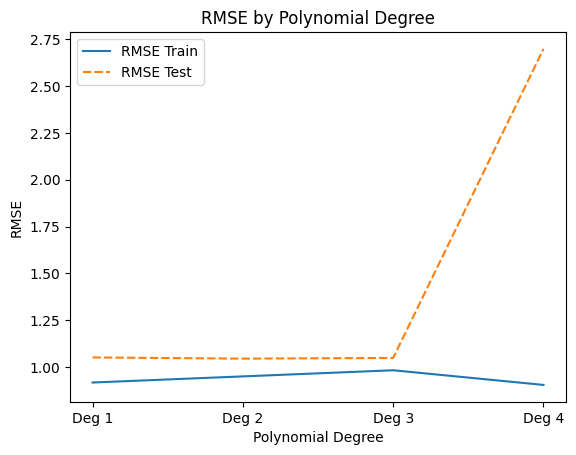

In [12]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

linreg = LinearRegression()
scaler = StandardScaler()
results = dict()

# First apply the standard scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Then apply the polynomial transformation
for i in range(1,5):
    poly = PolynomialFeatures(degree=i)
    fitted_transformed_X_train = poly.fit_transform(X_train_scaled)
    fitted_transformed_X_test = poly.transform(X_test_scaled)

    # Only then fit the model
    linreg.fit(fitted_transformed_X_train, y_train)
    MSE_train = np.mean((linreg.predict(fitted_transformed_X_train) - y_train) ** 2)  # Comparing against y_train
    RMSE_train = np.sqrt(MSE_train)
    MSE_test = np.mean((linreg.predict(fitted_transformed_X_test) - y_test) ** 2)  # Comparing against y_test
    RMSE_test = np.sqrt(MSE_test)

    results.update({f"Deg {i}": {RMSE_train, RMSE_test}})

df = pd.DataFrame.from_dict(results, orient='index')

df.columns = ['RMSE Train', 'RMSE Test']
print(df.T)

sns.lineplot(df)
plt.ylabel("RMSE")
plt.xlabel("Polynomial Degree")
plt.title("RMSE by Polynomial Degree")
plt.show()

I notice overfitting beginning on the fourth degree polynomial.


<details>

<summary>Answer</summary>

<img src="../assets/E3_overfitting.png" height="300"/>

</details>

#### ChatGPT explains:
Fitting and transforming data using both a scaler and `PolynomialFeatures` are two distinct preprocessing steps in the machine learning pipeline, each serving a different purpose:

1. **Scaling (Standardization/Normalization)**:
    - Scaling is used to bring all features to the same scale so that no single feature dominates the model due to its scale.
    - Different features might be measured in different units (e.g., height in centimeters and weight in kilograms), and their values may vary in magnitudes (e.g., age ranging from 0 to 100 and salary ranging from thousands to millions).
    - Many machine learning algorithms, especially those that use distance measures (like k-nearest neighbors) or regularization (like ridge regression or lasso), assume that all features are on a similar scale.

2. **Polynomial Features**:
    - `PolynomialFeatures` is used to create new feature interactions and polynomial terms to allow models (especially linear models) to capture more complex patterns in the data.
    - It generates a new feature matrix consisting of all polynomial combinations of the features with a degree less than or equal to the specified degree. For example, if you have two features `[a, b]` and you use a polynomial degree of 2, it would produce `[1, a, b, a^2, ab, b^2]`.
    - This is particularly useful if the relationship between the predictors and the target variable is non-linear.

Why both are necessary:
- **Non-linearity**: Real-world data often has non-linear relationships, and using polynomial features can help linear models capture these non-linear patterns.
  
- **Scale Sensitivity**: After introducing polynomial features, the scale of the data can become skewed. For example, if one feature has a range [1, 10] and we square it as part of polynomial features, the new range becomes [1, 100], which could dominate over the original features when used in a machine learning algorithm.
  
- **Interaction Terms**: Polynomial features include interaction terms (e.g., `a*b` if `a` and `b` are features). These interaction terms can be important for capturing the combined effect of different features on the target variable.

- **Performance**: Both steps can lead to better performance of the machine learning model. Scaling helps in faster convergence of gradient-based optimizers and more balanced regularization, while polynomial features can lead to a more accurate model by capturing the complexities of the data.

##### Another take on it
The process done this way involves two main stages of data preparation for machine learning models: scaling and generating polynomial features. It's crucial to understand the difference between `fit`, `transform`, and `fit_transform` methods and how they're correctly applied to training and test datasets. Here's the breakdown:

1. **Scaling:**
    - `.fit()` computes the necessary statistics (mean and standard deviation for standard scaling) to perform the transformation. You only `.fit()` on the training data because you want to use the parameters (mean and standard deviation) from the training data to scale the test data. This is to simulate a real-world scenario where you do not have access to future data (test data, in this case) and prevents data leakage.
    - `.transform()` uses the statistics computed from `.fit()` to scale the data. For the test data, you only `.transform()` it using the statistics from the training data.
    - `.fit_transform()` is a convenience method that does both fitting and transforming on the same dataset, which is what you want to do for the training data.

2. **Generating Polynomial Features:**
    - The same principles apply to generating polynomial features. You `.fit()` the `PolynomialFeatures` on the training data to learn the number of output features (including interaction terms) based on the degree you set.
    - Then you `.transform()` the training and test data to create these polynomial features. For the test data, you do not `.fit()` again because you want to use the same feature mapping created from the training data.

3. **Fitting the Model:**
    - Finally, you `.fit()` the machine learning model (e.g., `LinearRegression`) on the training data that has been scaled and transformed to include polynomial features. This is where the model learns the weights for each feature to predict the target variable.
    - You do not `.fit()` the model on the test data because fitting is the process of training the model, and the test data is only used for evaluation, not training.

In summary, you `.fit()` on training data to learn the parameters and then `.transform()` both the training and test data using those learned parameters. For generating polynomial features, it's essentially the same process: `.fit()` to learn the number of output features on the training data, and then `.transform()` both datasets. This ensures that both the scaling and feature transformation are consistent across your datasets, which is essential for fair evaluation of the model's performance.

---
## 5. Regularization methods (*)

Now we will try the regularization methods: ridge regression, lasso regression and elasticnet regression. In the following tasks, use degree = 4. 

&nbsp; a) Use ridge regression with cross-validation and test out different alpha-values. I used $\alpha=[0.01, 0.1, 0.5, 1, 5, 10]$ in the cross-validation. 
- Check which alpha, that the cross-validation chose as the best one. 
- Check the weights.
- Check MAE, MSE, RMSE.

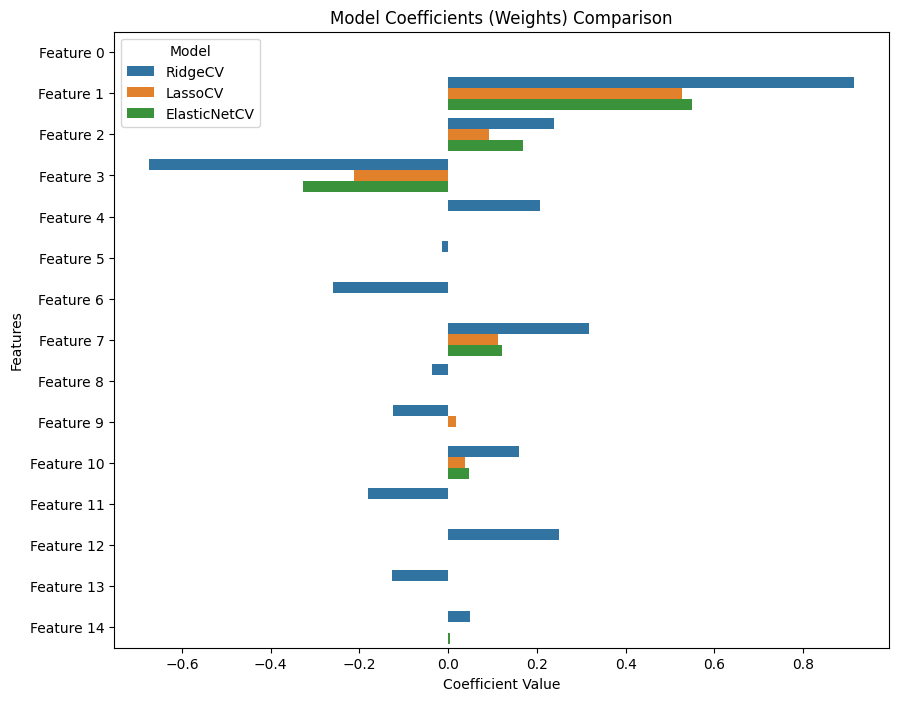

Metrics:
########

Model: RidgeCV
Best Alpha: 5.0
Training - MAE: 0.6920386297087926, MSE: 0.8602374675097153, RMSE: 0.9274898746130414
Test - MAE: 0.8314771334276909, MSE: 2.2195407789457366, RMSE: 1.4898123301093116

Model: LassoCV
Best Alpha: 0.1
Training - MAE: 0.7568099267098186, MSE: 0.9888539399326245, RMSE: 0.9944113534813571
Test - MAE: 0.7595535030461296, MSE: 1.2946329537696293, RMSE: 1.1378193853901546

Model: ElasticNetCV
Best Alpha: 0.1
Training - MAE: 0.7315904696983315, MSE: 0.952420821711793, RMSE: 0.9759204996882651
Test - MAE: 0.7575064951106518, MSE: 1.3432238588234693, RMSE: 1.1589753486694483



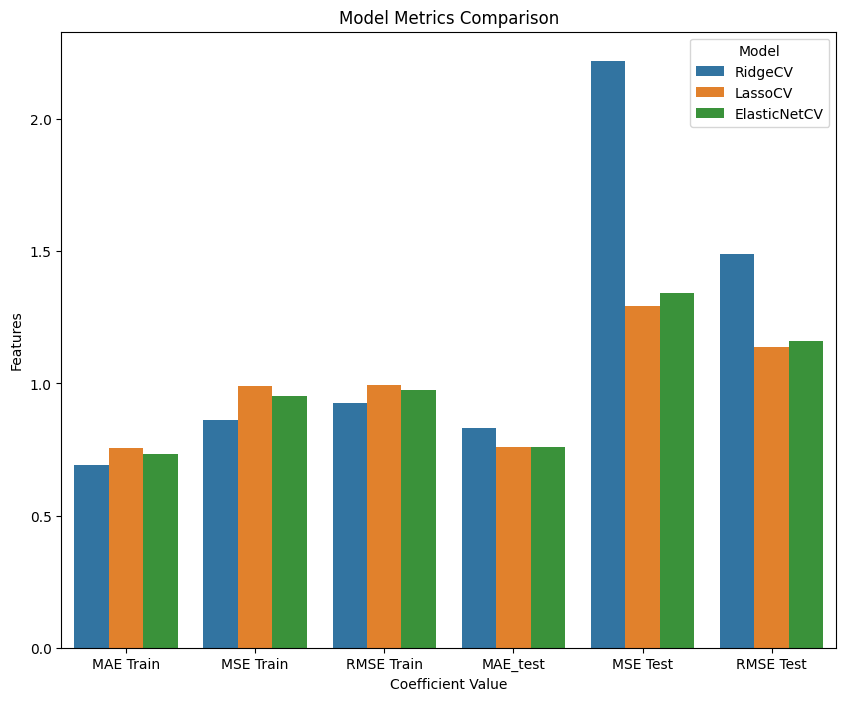

In [13]:
# Accidentally did all models using the same alphas here, but keeping for reference.
# Thus only the RidgeCV model us performing at its best here.

from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

a = [0.01, 0.1, 0.5, 1, 5, 10]

ridge_model = RidgeCV(alphas=a)
lasso_model = LassoCV(alphas=a, max_iter=10000)
elastic_model = ElasticNetCV(alphas=a, max_iter=10000)
model_list = [ridge_model, lasso_model, elastic_model]
model_names = ['RidgeCV', 'LassoCV', 'ElasticNetCV']
poly = PolynomialFeatures(degree=4)
coef_data = []
metrics_data = []

fitted_transformed_X_train = poly.fit_transform(X_train_scaled)
fitted_transformed_X_test = poly.transform(X_test_scaled)

ridge_model.fit(fitted_transformed_X_train, y_train)
lasso_model.fit(fitted_transformed_X_train, y_train)
elastic_model.fit(fitted_transformed_X_train, y_train)

# Gather coefficients from each model
for model, name in zip(model_list, model_names):
    coefs = model.coef_
    for i, coef in enumerate(coefs):
        coef_data.append({'Model': name, 'Feature': f'Feature {i}', 'Coefficient': coef})

# Convert data to DataFrame
coef_df = pd.DataFrame(coef_data)
print(coef_df.groupby('Model'))

plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', hue='Model', data=coef_df)
plt.title('Model Coefficients (Weights) Comparison')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

print("Metrics:\n########\n")
for model, name in zip(model_list, model_names):
    # Predictions
    y_train_pred = model.predict(fitted_transformed_X_train)
    y_test_pred = model.predict(fitted_transformed_X_test)
    
    # Calculating metrics for training data
    MSE_train_value = mean_squared_error(y_train, y_train_pred)
    RMSE_train_value = np.sqrt(MSE_train_value)
    MAE_train_value = mean_absolute_error(y_train, y_train_pred)
    
    # Calculating metrics for test data
    MSE_test_value = mean_squared_error(y_test, y_test_pred)
    RMSE_test_value = np.sqrt(MSE_test_value)
    MAE_test_value = mean_absolute_error(y_test, y_test_pred)

    print(f"Model: {model.__class__.__name__}")
    print(f"Best Alpha: {model.alpha_}")
    print(f"Training - MAE: {MAE_train_value}, MSE: {MSE_train_value}, RMSE: {RMSE_train_value}")
    print(f"Test - MAE: {MAE_test_value}, MSE: {MSE_test_value}, RMSE: {RMSE_test_value}\n")

    metrics_data.append({'Model': name, 'MAE Train': MAE_train_value, 'MSE Train': MSE_train_value, 'RMSE Train': RMSE_train_value, 'MAE_test': MAE_test_value, 'MSE Test': MSE_test_value, 'RMSE Test': RMSE_test_value})
    
metrics_df = pd.DataFrame(metrics_data)
metrics_melted = metrics_df.melt(id_vars=["Model"], var_name="Metric", value_name="Value")

plt.figure(figsize=(10, 8))
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_melted)
plt.title('Model Metrics Comparison')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()


&nbsp; b) Use lasso regression with cross-validation and choose number of alphas to 100. If you get a warning that the algorithm is not converging, increase the max iterations, I chose 10000 iterations. 
- Check which alpha, that the cross-validation chose as the best one. 
- Check the weights.
- Check MAE, MSE, RMSE.

In [23]:
# 1. Create the model
lasso_model = LassoCV(n_alphas=100, max_iter=10000)

# 2. Fit the model
lasso_model.fit(fitted_transformed_X_train, y_train)

print("Weights (coefficients):\n")
coefs = lasso_model.coef_
for i, coef in enumerate(coefs):
    print(f'Feature {i}: {coef}')

print(f"\nBest alpha for Lasso: {lasso_model.alpha_}\n")

# 3. Make Predictions
y_train_pred = lasso_model.predict(fitted_transformed_X_train)
y_test_pred = lasso_model.predict(fitted_transformed_X_test)

# Calculating metrics for training data
MSE_train_value = mean_squared_error(y_train, y_train_pred)
RMSE_train_value = np.sqrt(MSE_train_value)
MAE_train_value = mean_absolute_error(y_train, y_train_pred)

# Calculating metrics for test data
MSE_test_value = mean_squared_error(y_test, y_test_pred)
RMSE_test_value = np.sqrt(MSE_test_value)
MAE_test_value = mean_absolute_error(y_test, y_test_pred)

print(f"Training - MAE: {MAE_train_value}, MSE: {MSE_train_value}, RMSE: {RMSE_train_value}")
print(f"Test   -   MAE: {MAE_test_value}, MSE: {MSE_test_value}, RMSE: {RMSE_test_value}\n")


Weights (coefficients):

Feature 0: 0.0
Feature 1: 0.2295081990432173
Feature 2: 0.0
Feature 3: -0.0
Feature 4: -0.0
Feature 5: 0.0
Feature 6: 0.0879548631511204
Feature 7: 0.09662404219980449
Feature 8: 0.0
Feature 9: 0.03202517560193517
Feature 10: 0.0
Feature 11: 0.0
Feature 12: 0.0
Feature 13: -0.0
Feature 14: 0.0

Best alpha for Lasso: 0.2101676095425171

Training - MAE: 0.835818496951337, MSE: 1.1474901377665558, RMSE: 1.071209660975178
Test   -   MAE: 0.8243753626850194, MSE: 1.3485169772521441, RMSE: 1.1612566371186621




&nbsp; c) Use elasticnet regression with cross-validation and choose number of alphas to 100. If you get a warning that the algorithm is not converging, increase the max iterations, I chose 10000 iterations. Choose a set of $\ell_1$ ratios for it to try out. I chose $\ell_1 = [.001, .01, .05, .1, .5, .9, .95, 1]$
- Check which alpha, that the cross-validation chose as the best one. 
- Check the weights.
- Check MAE, MSE, RMSE.

In [27]:
elastic_model = ElasticNetCV(n_alphas=100, l1_ratio=[.001, .01, .05, .1, .5, .9, .95, 1], max_iter=10000)
elastic_model.fit(fitted_transformed_X_train, y_train)

coefs = elastic_model.coef_
for i, coef in enumerate(coefs):
    print(f'Feature {i}: {coef}')

print(f"\nBest α for ElasticNetCV:        {elastic_model.alpha_}")
print(f"Best l1-ratio for ElasticNetCV: {elastic_model.l1_ratio_}\n")

y_train_pred = elastic_model.predict(fitted_transformed_X_train)
y_test_pred = elastic_model.predict(fitted_transformed_X_test)

# Calculating metrics for training data
MSE_train_value = mean_squared_error(y_train, y_train_pred)
RMSE_train_value = np.sqrt(MSE_train_value)
MAE_train_value = mean_absolute_error(y_train, y_train_pred)

# Calculating metrics for test data
MSE_test_value = mean_squared_error(y_test, y_test_pred)
RMSE_test_value = np.sqrt(MSE_test_value)
MAE_test_value = mean_absolute_error(y_test, y_test_pred)

print(f"Training - MAE: {MAE_train_value}, MSE: {MSE_train_value}, RMSE: {RMSE_train_value}")
print(f"Test  -    MAE: {MAE_test_value}, MSE: {MSE_test_value}, RMSE: {RMSE_test_value}\n")


Feature 0: 0.0
Feature 1: 0.5162845458040425
Feature 2: 0.09794358529089249
Feature 3: -0.21127580030134374
Feature 4: 0.0
Feature 5: 0.0
Feature 6: 0.0
Feature 7: 0.1134245840355822
Feature 8: 0.0
Feature 9: 0.01797787179804972
Feature 10: 0.036954730080706384
Feature 11: 0.0
Feature 12: 0.0
Feature 13: 0.0
Feature 14: 0.0

Best α for ElasticNetCV:        0.10839018107107092
Best l1-ratio for ElasticNetCV: 0.9

Training - MAE: 0.7573126167245589, MSE: 0.9895909835465548, RMSE: 0.9947818773713938
Test  -    MAE: 0.7611548010990521, MSE: 1.3001330582059065, RMSE: 1.1402337734894132




<details>

<summary>Answer</summary>

a) 

Chosen alpha from cross-validation 5.0

Weights: [ 0.          0.91469637  0.23893931 -0.67583593  0.20550801 -0.01369317
 -0.26007685  0.31867863 -0.03429744 -0.12484035  0.16000319 -0.18105113
  0.24878399 -0.12692847  0.05002613]

Mean absolute error: 0.831

Mean squared error: 2.208

Root mean squared error: 1.486

b) 

Chosen alpha from cross-validation 0.208

Weights: [ 0.          0.23469707  0.         -0.         -0.          0.
  0.08814685  0.09735986  0.          0.03219702  0.          0.
  0.         -0.          0.        ]

Mean absolute error: 0.823

Mean squared error: 1.345

Root mean squared error: 1.160

c)

Chosen alpha from cross-validation 0.107

Mean absolute error: 0.761

Root mean squared error: 1.139

L1_ratio: 0.9

Weights: [ 0.          0.23469707  0.         -0.         -0.          0.
  0.08814685  0.09735986  0.          0.03219702  0.          0.
  0.         -0.          0.        ]


</details>

## ChatGPT reder ut begreppen

De tre sorters modeller du nämner – **RidgeCV**, **LassoCV**, och **ElasticNetCV** – är alla varianter av linjär regression som använder reglering (regularization) för att förhindra överanpassning (overfitting) och hantera multicollinearitet mellan prediktorerna. Dessa modeller skiljer sig åt i hur de lägger till regleringstermer till förlustfunktionen. Nedan förklaras varje modell och dess distinkta egenskaper:

### Ridge Regression (RidgeCV)

- **Ridge Regression**, även känd som **Tikhonov regularization**, lägger till en regleringsterm till förlustfunktionen som är lika med kvadraten på magnituden av koefficienterna (L2-straff). Detta tvingar koefficienterna att minska i storlek men tillåter dem inte att nå exakt noll, vilket kan vara användbart när alla variabler har en viss effekt på utfallet och du vill behålla alla i modellen. En förlustfunktion, även känd som kostnadsfunktion, är en matematisk funktion som används inom maskininlärning och statistik för att kvantifiera hur bra en modell presterar. Förlustfunktionen mäter skillnaden mellan modellens förutsägelser och de faktiska observerade värdena. 
- **RidgeCV** är en variant av Ridge Regression som använder korsvalidering (cross-validation) för att automatiskt välja den bästa regleringsparametern (\(\alpha\)).

### Lasso Regression (LassoCV)

- **Lasso Regression** (Least Absolute Shrinkage and Selection Operator) lägger till en regleringsterm till förlustfunktionen som är lika med absolutvärdet av magnituden av koefficienterna (L1-straff). Detta kan leda till att vissa koefficienter exakt blir noll, vilket innebär att Lasso kan fungera som en metod för variabelurval genom att utesluta vissa variabler helt.
- **LassoCV** använder korsvalidering för att hitta den optimala regleringsparametern (\(\alpha\)).

### Elastic Net (ElasticNetCV)

- **Elastic Net** är en hybrid mellan Ridge och Lasso regression. Den lägger till båda regleringstermerna (L1 och L2) till förlustfunktionen. Detta gör Elastic Net flexibelt nog att både krympa koefficienterna (som Ridge) och utföra variabelurval (som Lasso), vilket kan vara särskilt användbart när det finns korrelation mellan prediktorerna.
- **ElasticNetCV** kombinerar fördelarna med både Lasso och Ridge, och använder korsvalidering för att hitta de optimala värdena på regleringsparametrarna (\(\alpha\) och \(\lambda\), där \(\alpha\) styr balansen mellan L1 och L2 reglering).

### Sammanfattning

- **RidgeCV** är bäst när alla prediktorer förväntas vara relevanta eller när du har mer prediktorer än observationer.
- **LassoCV** är användbart för variabelurval och när du har ett stort antal prediktorer, varav många förväntas vara irrelevant för utfallet.
- **ElasticNetCV** är ett mellanting som kan hantera situationer med både hög dimension och korrelation mellan prediktorerna effektivt.

Att välja mellan dessa modeller beror på den specifika datasituationen och vilka antaganden du gör om dina data och de underliggande relationerna.

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---